## 1- Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2- Loading Dataset

In [2]:
df = pd.read_csv('Customer.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3-EDA (Exploraty Data Analysis)

In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# (1) K-Means

## 1- Pre-processing/Normalization

- Pre-processing

In [6]:
featureset = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

- Normalization

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[featureset])

## 2- Setting up K-Means

In [8]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

c:\Users\Asus\Desktop\ML\myvenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Asus\Desktop\ML\myvenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


## 3- Plotting the Elbow Method

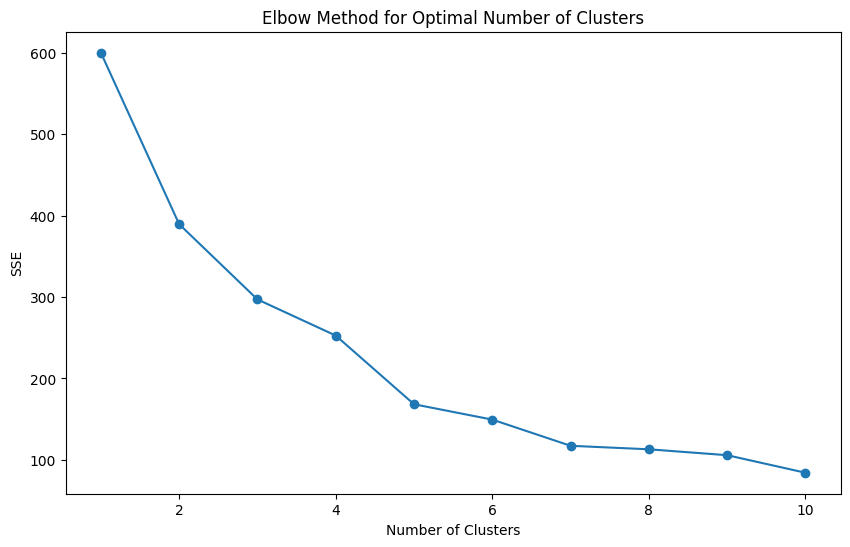

In [9]:
plt.figure(figsize=(10, 6))

plt.plot(range(1, 11), sse, marker='o')

plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')

plt.show()

## 4- Modeling (with 5 cluster based on Elbow Method)

In [10]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(scaled_data)

df['km_Cluster'] = kmeans.labels_

- Insight

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),km_Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4


- Silhouette Score

In [12]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_data, kmeans.labels_)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.41664341513732767


## 5- Plotting the Model

- 2D

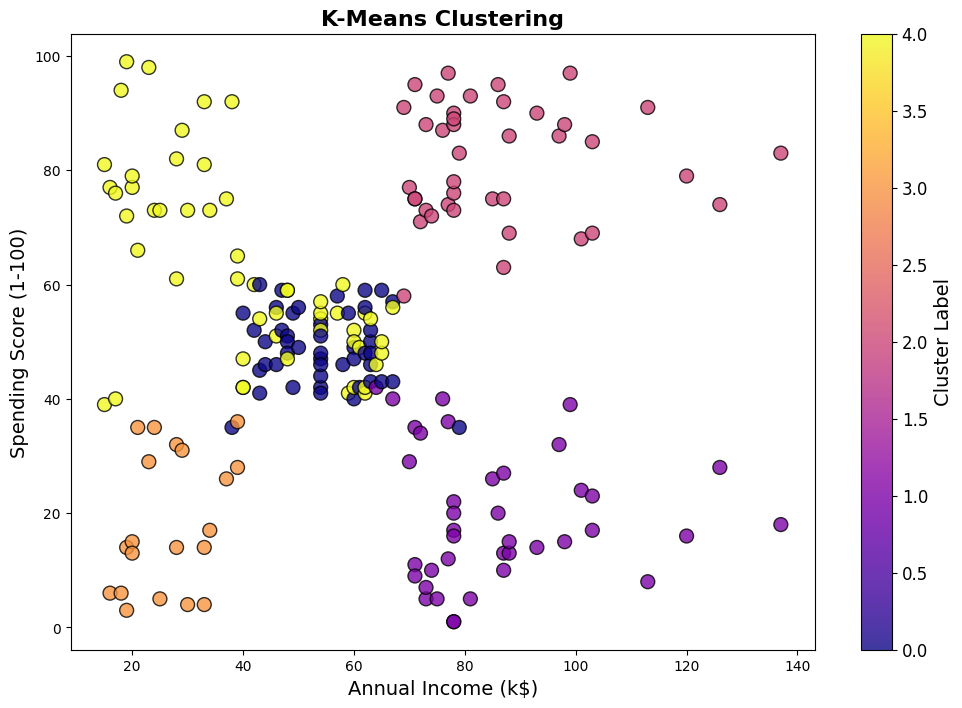

In [13]:
plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['km_Cluster'],
    cmap='plasma',
    marker='o',
    edgecolor='k',
    s=100,  
    alpha=0.8
)

plt.title('K-Means Clustering', fontsize=16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label', fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.show()

In [14]:
# plt.figure(figsize=(12, 8))

# plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['km_Cluster'], cmap='viridis', marker='o', edgecolor='k')

# plt.title('K-Means Clustering')
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
# plt.colorbar(label='Cluster Label')

# plt.show()

- 3D

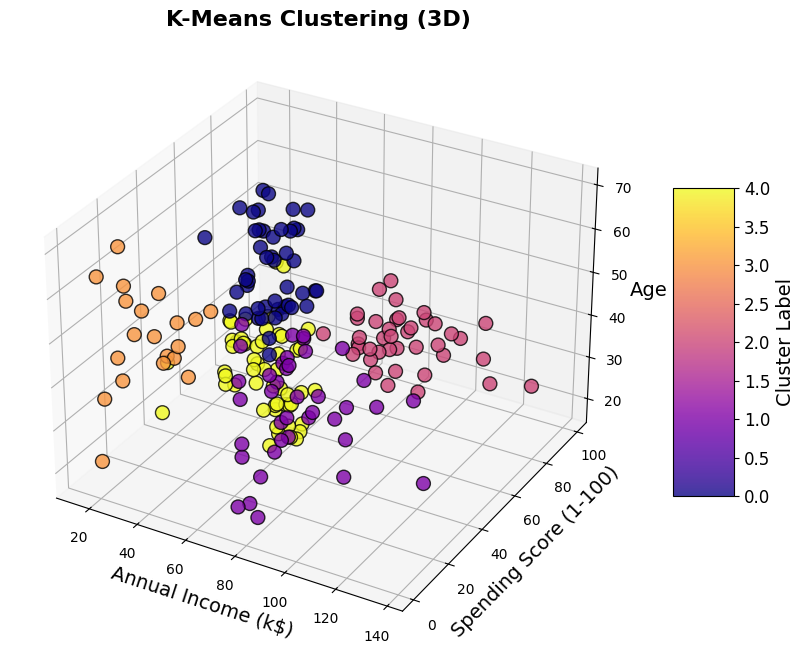

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    df['Age'],
    c=df['km_Cluster'],
    cmap='plasma',
    marker='o',
    edgecolor='k',
    s=100,
    alpha=0.8
)

ax.set_title('K-Means Clustering (3D)', fontsize=16, fontweight='bold')
ax.set_xlabel('Annual Income (k$)', fontsize=14)
ax.set_ylabel('Spending Score (1-100)', fontsize=14)
ax.set_zlabel('Age', fontsize=14)

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Cluster Label', fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.show()

In [16]:
# fig = plt.figure(figsize=(12, 8))

# ax = fig.add_subplot(111, projection='3d')
# sc = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['km_Cluster'], cmap='viridis', marker='o', edgecolor='k')

# ax.set_title('K-Means Clustering in 3D')
# ax.set_xlabel('Age')
# ax.set_ylabel('Annual Income (k$)')
# ax.set_zlabel('Spending Score (1-100)')
# plt.colorbar(sc, label='Cluster Label')

# plt.show()

# (2) Hierarchical

## 1- Importing Libraries for Hierarchical

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster import hierarchy 

## 2- Pre-processing/Normalization

- Pre-processing

In [18]:
featureset1 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

- Normalization

In [19]:
from sklearn.preprocessing import MinMaxScaler

X = featureset1.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(X)

feature_mtx[0:5]

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918]])

In [20]:
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df[featureset])

## 3- Agglomerative Clustering 

In [21]:
from sklearn.metrics.pairwise import euclidean_distances

dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.43029381 0.33738296 ... 1.00888686 1.0528145  1.11639204]
 [0.43029381 0.         0.76559158 ... 0.93683095 1.20748243 1.01507247]
 [0.33738296 0.76559158 0.         ... 1.16089362 1.02563246 1.27984489]
 ...
 [1.00888686 0.93683095 1.16089362 ... 0.         0.57849818 0.13432353]
 [1.0528145  1.20748243 1.02563246 ... 0.57849818 0.         0.66437953]
 [1.11639204 1.01507247 1.27984489 ... 0.13432353 0.66437953 0.        ]]


In [22]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\Asus\AppData\Local\Temp\ipykernel_7456\1633147189.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


## 4- Plotting Dendrogram

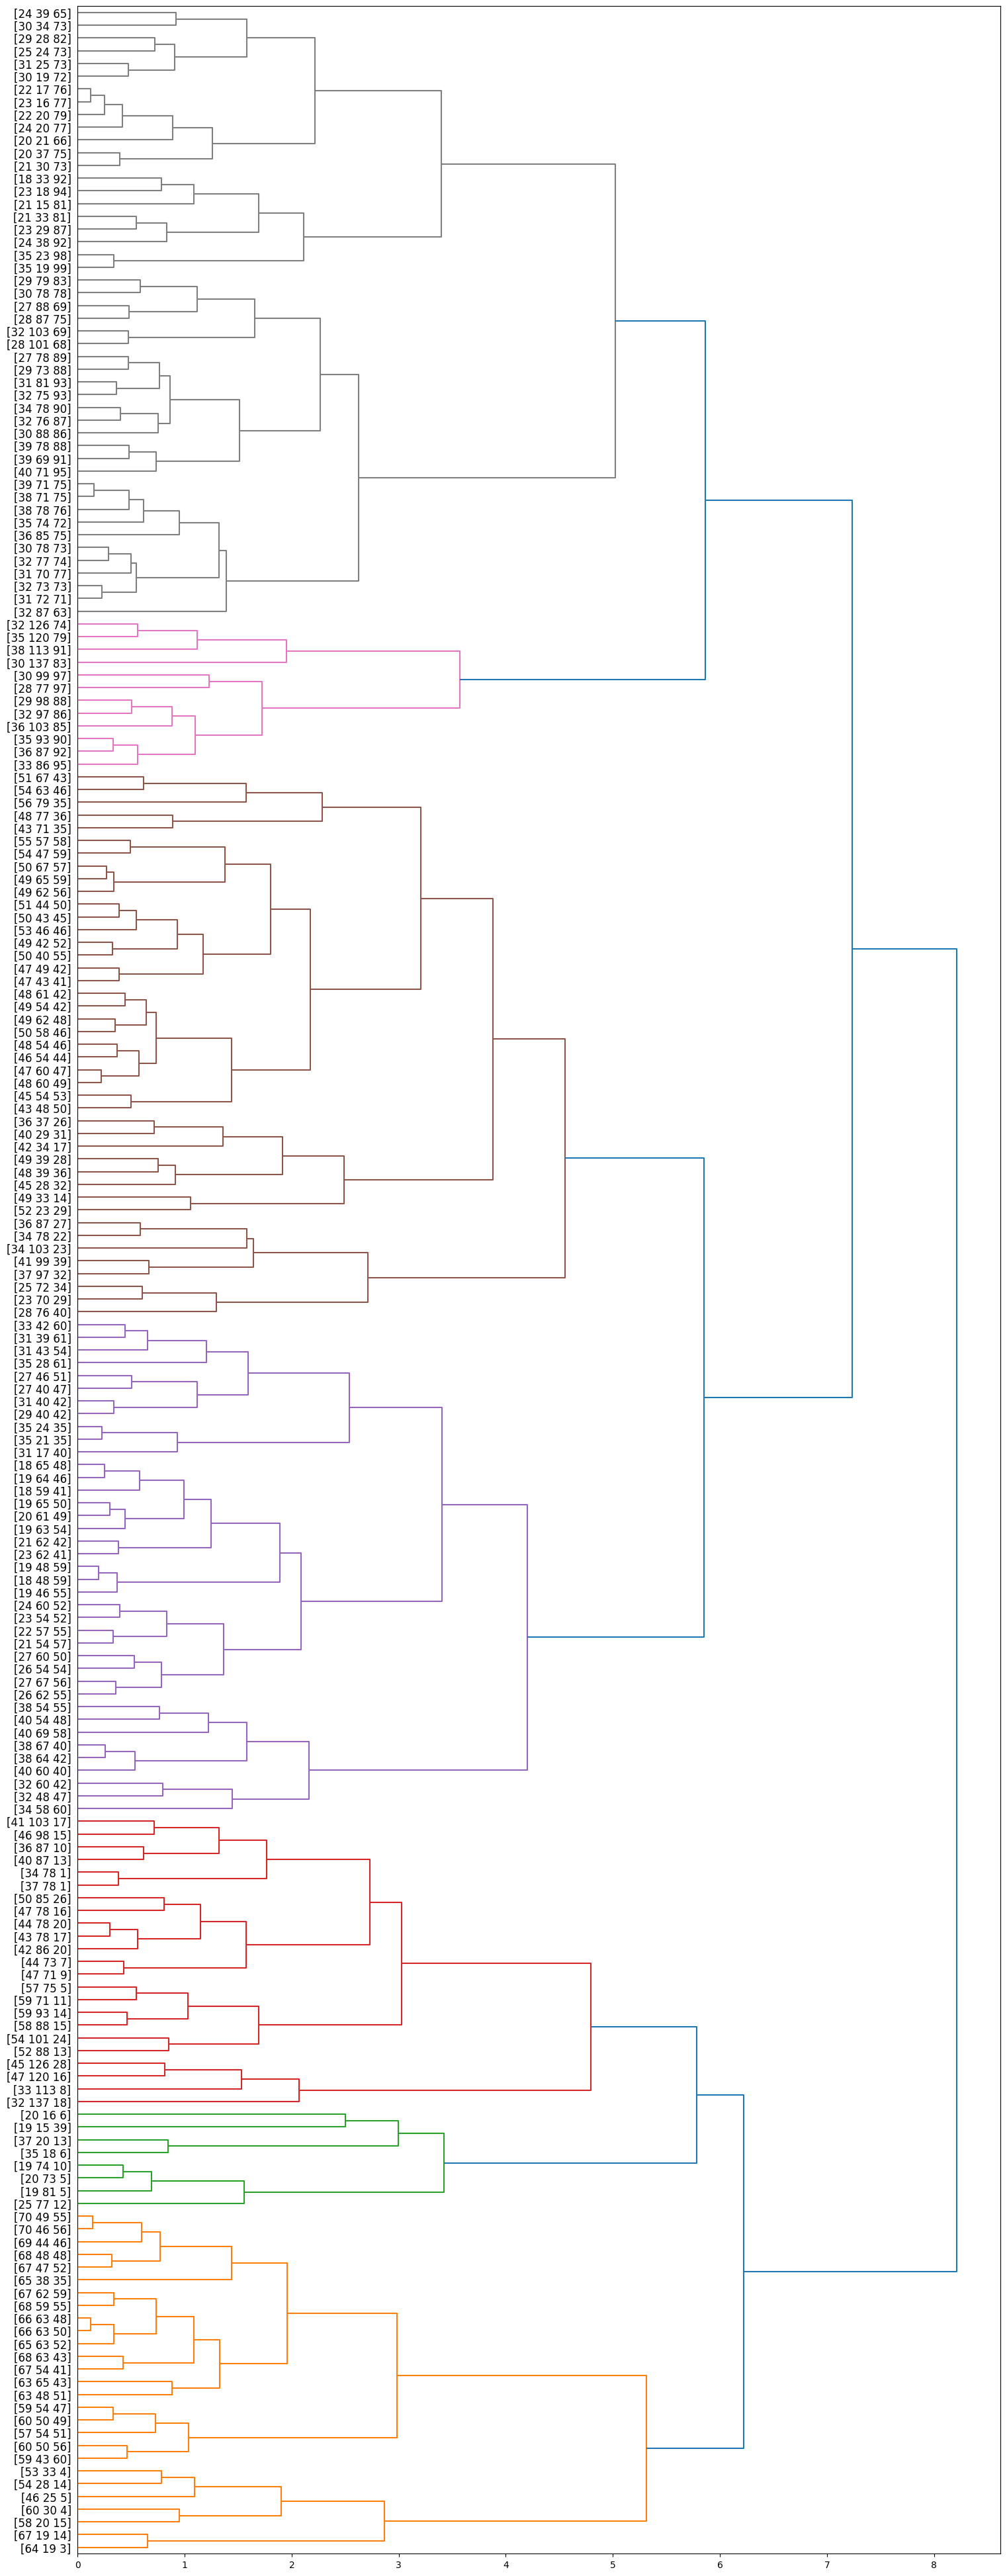

In [23]:
import pylab as pl

fig = pl.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['Age'][id], df['Annual Income (k$)'][id],df['Spending Score (1-100)'][id])
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [24]:
# fig, ax = plt.subplots(figsize=(12, 8))

# dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, ax=ax)

# ax.set_title('Dendrogram for Hierarchical Clustering', fontsize=15)
# ax.set_xlabel('Sample index', fontsize=12)
# ax.set_ylabel('Distance', fontsize=12)

# fig.tight_layout()

# plt.show()

## 5- Choosing the number of Clusters


In [25]:
linked = linkage(scaled_data, method='ward')

In [26]:
num_clusters = 5
df['hi_Cluster'] = fcluster(linked, num_clusters, criterion='maxclust')

- Silhouette Score

In [27]:
score = silhouette_score(scaled_data, df['hi_Cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.39002826186267214


- Insight

In [28]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),km_Cluster,hi_Cluster
0,1,Male,19,15,39,4,2
1,2,Male,21,15,81,4,5
2,3,Female,20,16,6,3,2
3,4,Female,23,16,77,4,5
4,5,Female,31,17,40,4,2


## 6- Plotting the Model

- 2D

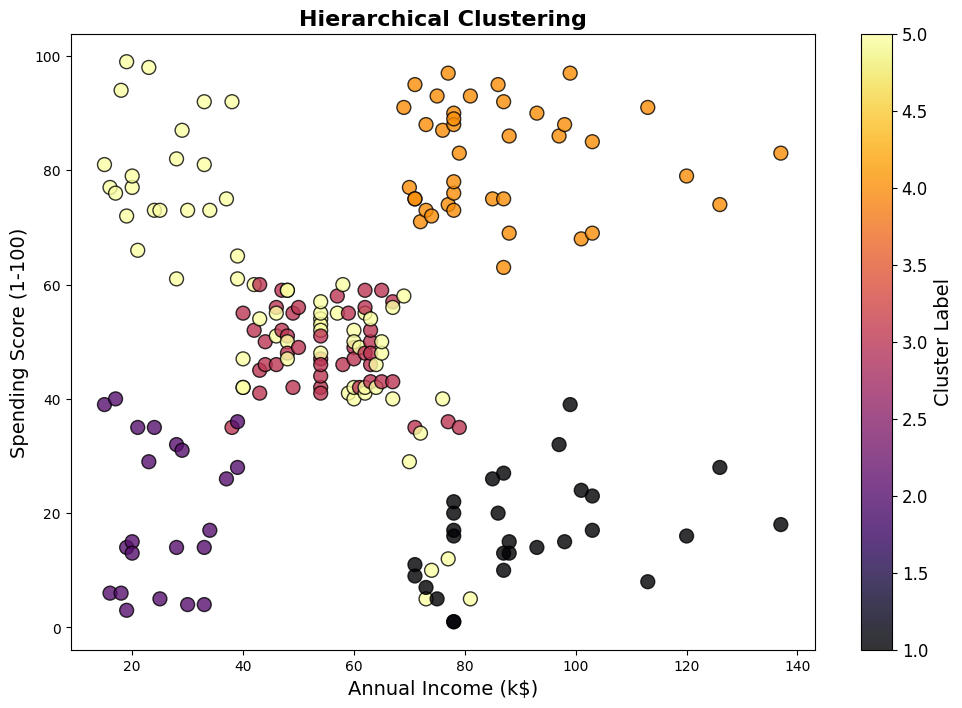

In [29]:
plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['hi_Cluster'],
    cmap='inferno',
    marker='o',
    edgecolor='k',
    s=100,
    alpha=0.8
)

plt.title('Hierarchical Clustering', fontsize=16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label', fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.show()

In [30]:
# plt.figure(figsize=(12, 8))

# plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['hi_Cluster'], cmap='viridis', marker='o', edgecolor='k')

# plt.title('Hierarchical Clustering')
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
# plt.colorbar(label='Cluster Label')
# plt.show()

- 3D

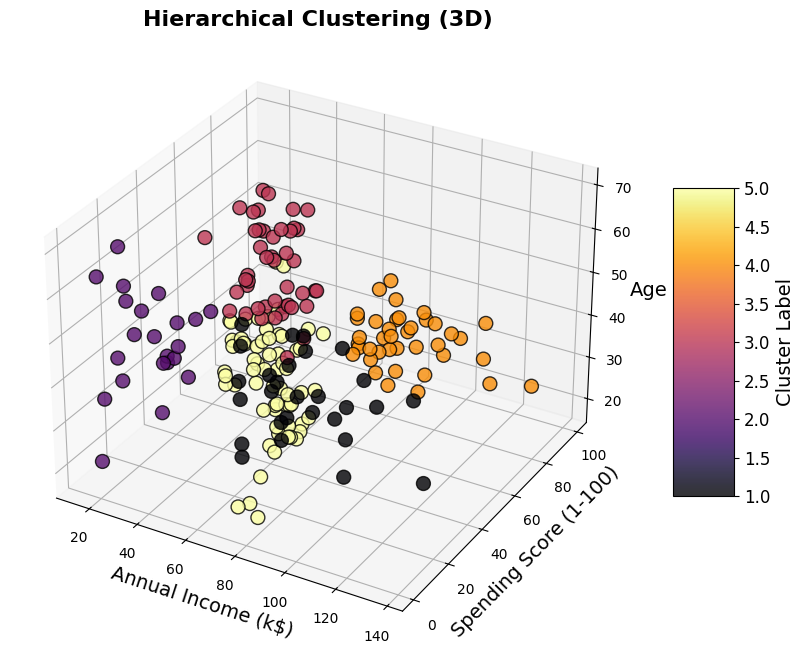

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    df['Age'],
    c=df['hi_Cluster'],
    cmap='inferno',
    marker='o',
    edgecolor='k',
    s=100,
    alpha=0.8
)

ax.set_title('Hierarchical Clustering (3D)', fontsize=16, fontweight='bold')
ax.set_xlabel('Annual Income (k$)', fontsize=14)
ax.set_ylabel('Spending Score (1-100)', fontsize=14)
ax.set_zlabel('Age', fontsize=14)  

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Cluster Label', fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.show()

In [32]:
# fig = plt.figure(figsize=(12, 8))

# ax = fig.add_subplot(111, projection='3d')
# sc = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['hi_Cluster'], cmap='viridis', marker='o', edgecolor='k')

# ax.set_title('K-Means Clustering in 3D')
# ax.set_xlabel('Age')
# ax.set_ylabel('Annual Income (k$)')
# ax.set_zlabel('Spending Score (1-100)')
# plt.colorbar(sc, label='Cluster Label')

# plt.show()

# (3) DBSCAN

## 1- Importing Libaries for DBSCAN

In [33]:
from sklearn.cluster import DBSCAN

## 2- Pre-processing/Normalization

- Pre-processing

In [34]:
featureset = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

- Normalization

In [35]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[featureset])

## 3- Setting up DBSCAN

In [36]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

dbscan.fit(scaled_data)

df['db_Cluster'] = dbscan.labels_

- Insight

In [37]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),km_Cluster,hi_Cluster,db_Cluster
0,1,Male,19,15,39,4,2,-1
1,2,Male,21,15,81,4,5,0
2,3,Female,20,16,6,3,2,-1
3,4,Female,23,16,77,4,5,0
4,5,Female,31,17,40,4,2,-1


## 4- Plotting the Model

- 2D

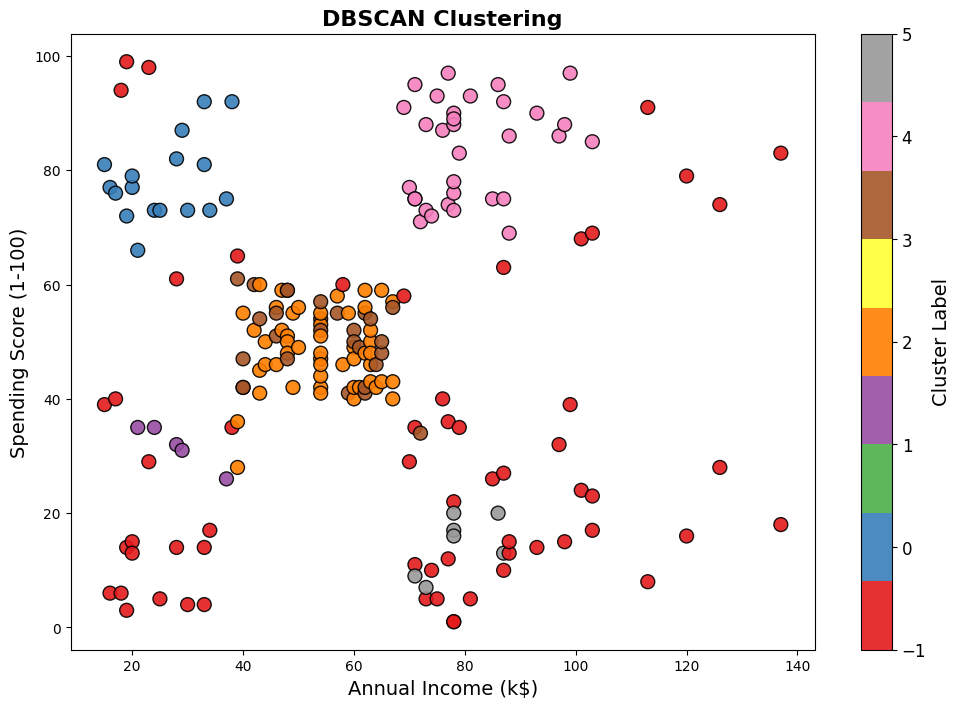

In [38]:
plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['db_Cluster'],
    # cmap='plasma',
    cmap='Set1',
    # cmap='coolwarm',
    # cmap='tab10',
    marker='o',
    edgecolor='k',
    s=100,
    alpha=0.9
)

plt.title('DBSCAN Clustering', fontsize=16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label', fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.show()

In [39]:
# plt.figure(figsize=(12, 8))

# plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['db_Cluster'], cmap='viridis', marker='o', edgecolor='k')

# plt.title('DBSCAN Clustering')
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
# plt.colorbar(label='Cluster Label')

# plt.show()

- 3D

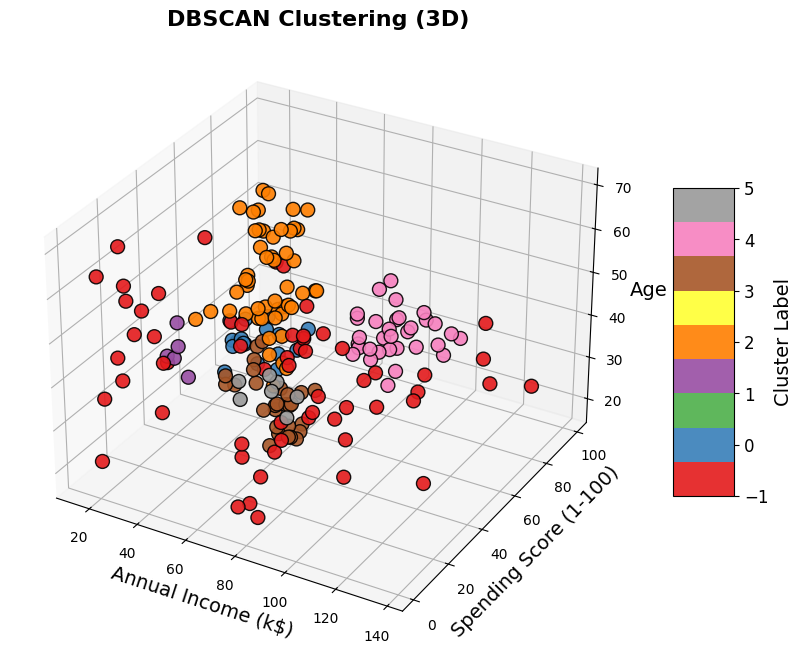

In [43]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    df['Age'],
    c=df['db_Cluster'],
    cmap='Set1',
    # cmap='coolwarm',
    # cmap='tab10',
    marker='o',
    edgecolor='k',
    s=100,
    alpha=0.9
)

ax.set_title('DBSCAN Clustering (3D)', fontsize=16, fontweight='bold')
ax.set_xlabel('Annual Income (k$)', fontsize=14)
ax.set_ylabel('Spending Score (1-100)', fontsize=14)
ax.set_zlabel('Age', fontsize=14)

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Cluster Label', fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.show()

In [41]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')

# sc = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['db_Cluster'], cmap='viridis', marker='o', edgecolor='k')

# ax.set_title('DBSCAN Clustering in 3D')
# ax.set_xlabel('Age')
# ax.set_ylabel('Annual Income (k$)')
# ax.set_zlabel('Spending Score (1-100)')

# plt.colorbar(sc, label='Cluster Label')

# plt.show()